In [1]:
import pandas as pd
df=pd.read_csv("housing.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

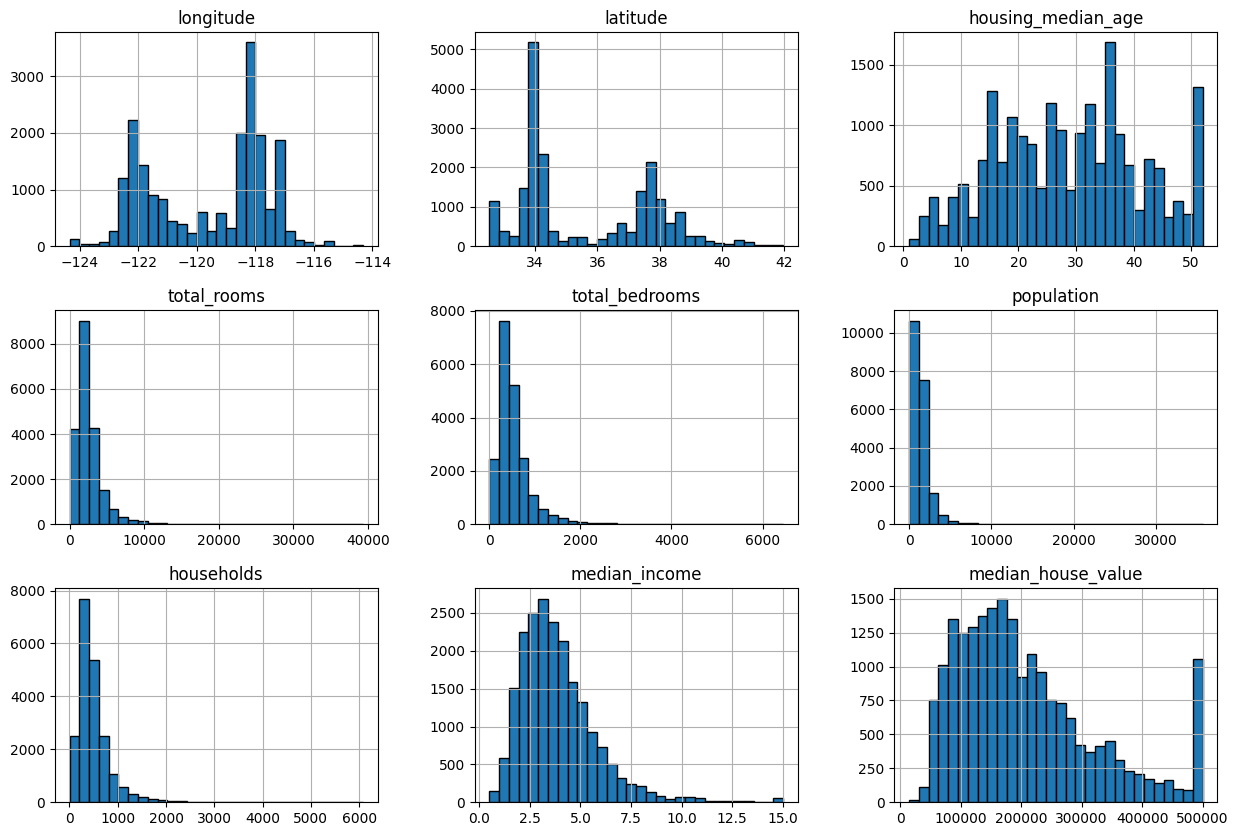

In [7]:
df.hist(figsize=(15,10),bins=30,edgecolor="black")

TypeError: cannot convert the series to <class 'float'>

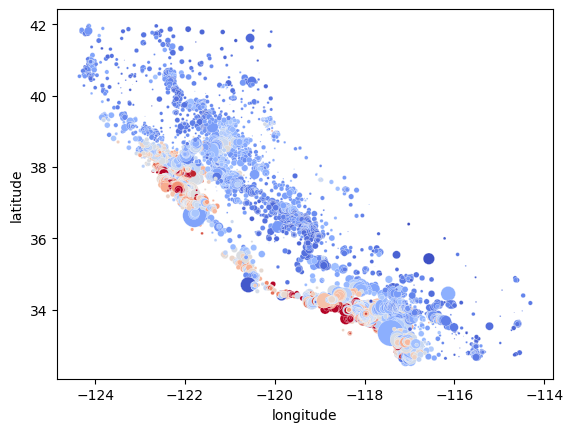

In [10]:
import seaborn as sb
sb.scatterplot(x="longitude",y="latitude",data=df,hue="median_house_value",palette="coolwarm",s=df["population"]/100)

In [14]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:
df_na=df.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
dummies=pd.get_dummies(df["ocean_proximity"],dtype=int)

In [20]:
df_na=df_na.join(dummies)

In [21]:
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [22]:
df_na=df_na.drop(["ocean_proximity"],axis=1)
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

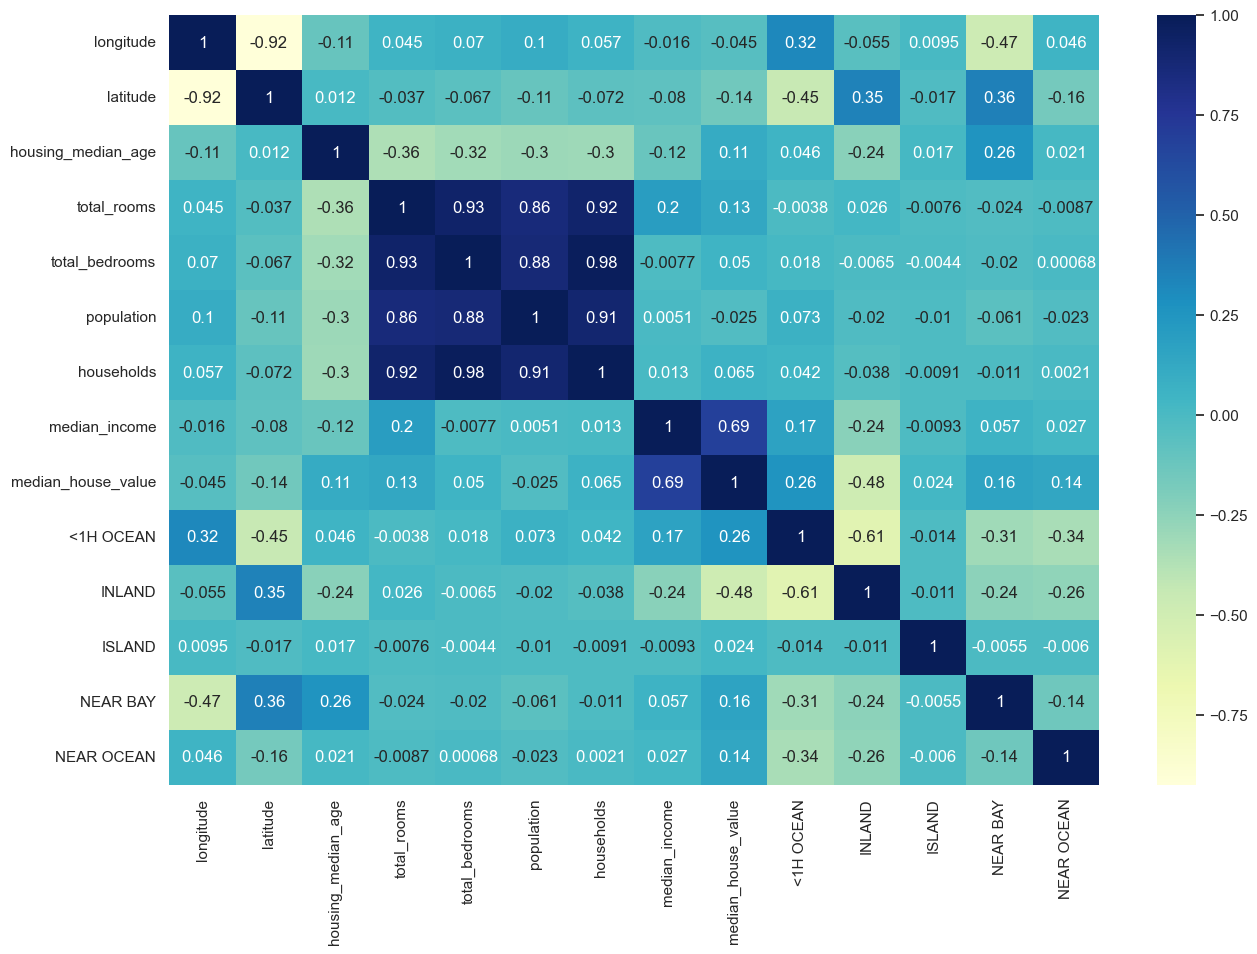

In [26]:
sb.set(rc={"figure.figsize":(15,10)})
sb.heatmap(df_na.corr(),annot=True,cmap="YlGnBu")

In [31]:
df_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [32]:
df_na["ratio_bedrooms"]=df_na["total_bedrooms"]/df_na["total_rooms"]

<Axes: >

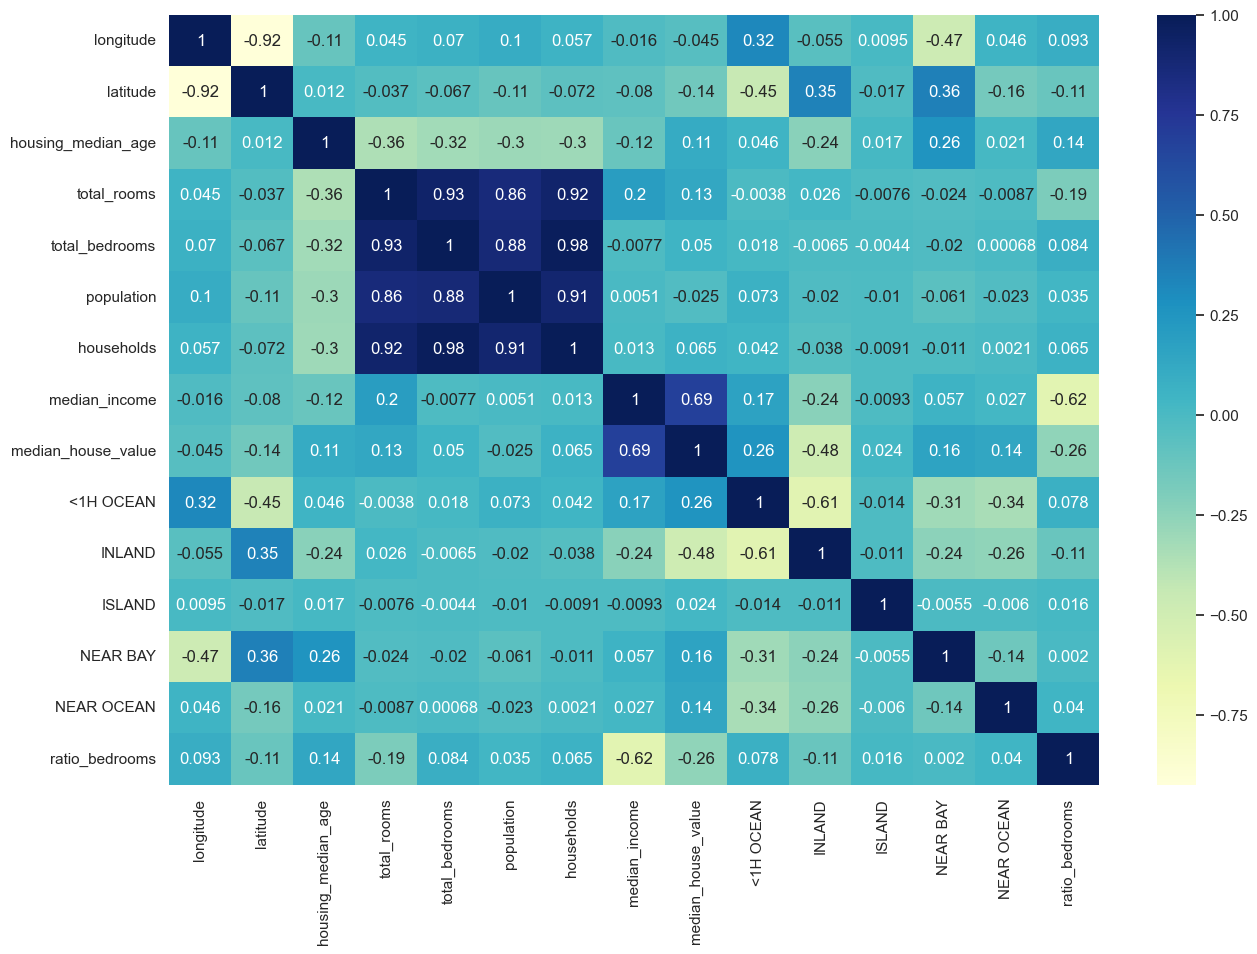

In [33]:
sb.set(rc={"figure.figsize":(15,10)})
sb.heatmap(df_na.corr(),annot=True,cmap="YlGnBu")

In [34]:
X=df_na.drop(["median_house_value"],axis=1)
y=df_na["median_house_value"]

In [39]:
from sklearn.model_selection import train_test_split
X_ent,X_pru,y_ent,y_pru=train_test_split(X,y,test_size=.2)

In [44]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()


In [45]:
modelo.fit(X_ent,y_ent)

LinearRegression()

In [47]:
prediccion=modelo.predict(X_pru)
comparativa={
    "Prediccion":prediccion,
    "Valor":y_pru
}
pd.DataFrame(comparativa)


,Prediccion,Valor
3409,234750.437081,217100.0
6530,141082.724077,165900.0
16334,188527.247878,162100.0
5921,304322.192456,349100.0
1384,263369.106771,206700.0
...,...,...
274,280318.042956,253000.0
983,196144.514985,293200.0
1997,81188.039257,52600.0
3180,125883.314230,126400.0


In [48]:
print(modelo.score(X_ent,y_ent))
print(modelo.score(X_pru,y_pru))

0.6577728080541609
0.6293126677311022


In [57]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pru,prediccion)
mse

5011225992.06879

In [58]:
import numpy as np
rmse=np.sqrt(mse)
rmse

70790.01336395403

In [59]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_ent_esc=scale.fit_transform(X_ent)
X_pru_esc=scale.fit_transform(X_pru)

In [60]:
pd.DataFrame(X_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.787305,-0.731105,0.186138,-0.518258,-0.403393,0.111231,-0.401463,-0.228252,-0.889023,1.461995,-0.017492,-0.353529,-0.383835,0.546827
1,-1.382332,0.898552,1.775630,-0.030987,-0.492322,-0.494743,-0.502184,2.893164,-0.889023,-0.683997,-0.017492,-0.353529,2.605287,-1.445165
2,1.132247,-0.698325,0.821935,-0.392065,-0.485112,-0.520662,-0.473028,-1.011406,-0.889023,1.461995,-0.017492,-0.353529,-0.383835,-0.432764
3,-1.352337,1.039040,1.855104,-1.058033,-1.090794,-1.136468,-1.117110,-0.832166,-0.889023,-0.683997,-0.017492,2.828622,-0.383835,0.596943
4,-0.592464,0.964113,-0.370185,-0.161325,-0.273604,-0.229294,-0.266286,-0.023880,-0.889023,1.461995,-0.017492,-0.353529,-0.383835,-0.479928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.812301,-0.890324,-0.370185,0.720644,0.435429,0.933497,0.571286,0.730566,1.124831,-0.683997,-0.017492,-0.353529,-0.383835,-0.726534
16342,0.767308,-0.726422,0.265612,-0.392526,-0.126990,0.275685,-0.117855,-0.746832,-0.889023,1.461995,-0.017492,-0.353529,-0.383835,1.013711
16343,1.197236,-0.525056,-1.085456,1.160017,0.973813,1.316029,1.056336,-0.199439,-0.889023,1.461995,-0.017492,-0.353529,-0.383835,-0.522843
16344,0.372374,-0.698325,-0.529134,4.161478,2.867772,2.351012,3.107857,1.643956,-0.889023,-0.683997,-0.017492,-0.353529,2.605287,-1.120122
